In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('cgpa-package.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


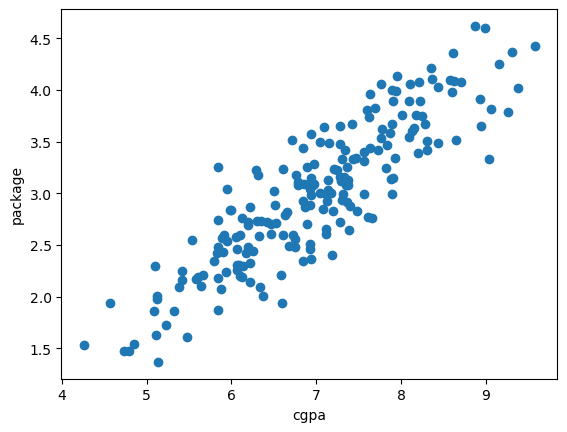

In [7]:
plt.scatter(df.cgpa,df.package)
plt.xlabel('cgpa')
plt.ylabel('package');

In [8]:
df.iloc[:,-1]

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0], df.iloc[:,-1], test_size=0.2, random_state=42)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

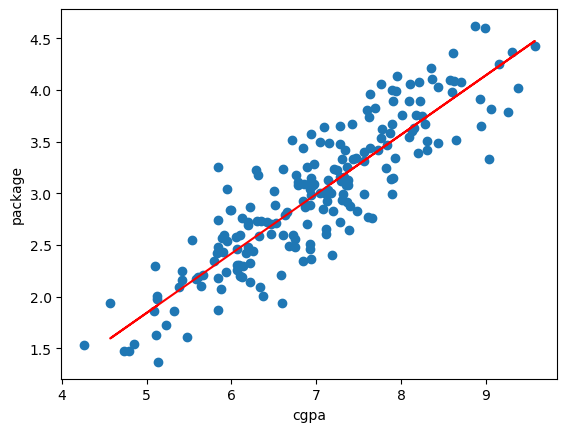

In [12]:
plt.scatter(df.cgpa,df.package)
plt.plot(X_train,lr.predict(X_train.values.reshape(-1,1)),color='red')
plt.xlabel('cgpa')
plt.ylabel('package');

In [13]:
y_pred = lr.predict(X_test.values.reshape(-1,1))

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [15]:
mean_absolute_error(y_test, y_pred)

0.23150985393278373

In [16]:
mean_squared_error(y_test, y_pred)

0.08417638361329657

In [17]:
r2_score = r2_score(y_test, y_pred)

In [18]:
r2_score

0.7730984312051673

#### Adjusted R2-score

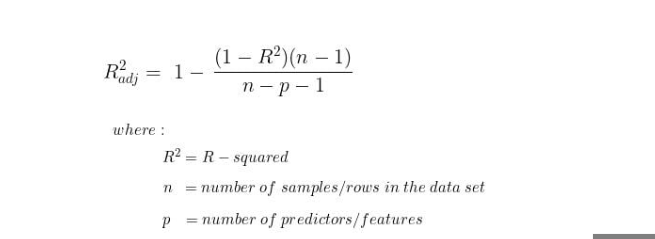

In [19]:
adjusted_r2_score = 1 - ((1-r2_score)*(int(X_test.shape[0])-1)/(int(X_test.shape[0])-1-1))

In [20]:
adjusted_r2_score

0.7671273372895138

### Now adding a random feature to the dataset and will see whether it create the r2_score or not and if adjusted_r2_score is giving better picture

In [21]:
new_df1 = df.copy()

new_df1['random_feature'] = np.random.random(200)

In [22]:
new_df1

,cgpa,package,random_feature
0,6.89,3.26,0.139071
1,5.12,1.98,0.821556
2,7.82,3.25,0.270478
3,7.42,3.67,0.340201
4,6.94,3.57,0.630973
...,...,...,...
195,6.93,2.46,0.441603
196,5.89,2.57,0.384095
197,7.21,3.24,0.308069
198,7.63,3.96,0.876253


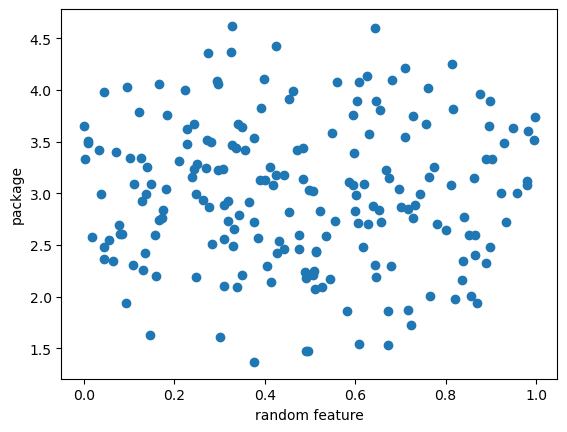

In [23]:
plt.scatter(new_df1.random_feature, new_df1.package)
plt.xlabel('random feature')
plt.ylabel('package');

In [24]:
new_df1 = new_df1[['cgpa', 'random_feature', 'package']]

In [25]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [27]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred1 = lr.predict(X_test)

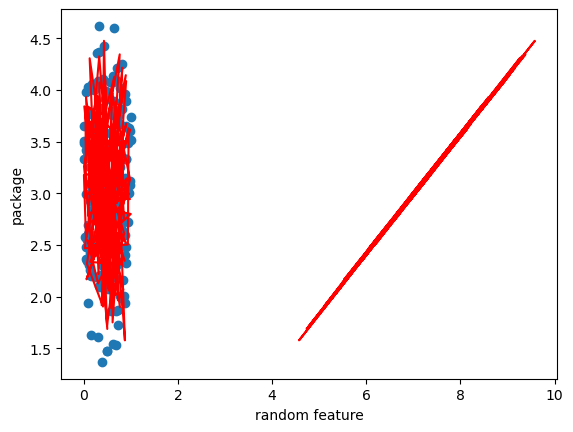

In [29]:
plt.scatter(new_df1.random_feature, new_df1.package)
plt.plot(X_train, lr.predict(X_train),color='red')
plt.xlabel('random feature')
plt.ylabel('package');

In [30]:
r2_value1=r2_score(y_test,y_pred1)

TypeError: 'numpy.float64' object is not callable

In [ ]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

In [ ]:
ad_r2 = 1 - ((1-r2_score(y_test,y_pred))*(40-1)/(40-1-1))
ad_r2